# Описание проекта

Компания (федеральный оператор сотовой связи) предлагает клиентам два тарифных плана: "Смарт" и "Ультра". В целях корректировки рекламного бюджета маркетинговый департамент хочет выбрать наиболее прибыльный тариф. В распоряжении есть выборка из 500 клиентов за 2018 год: статистика звонков, интернет трафике, отправленных сообщениях и данные клиентов.

Описание тарифов:

*Тариф «Смарт»*:
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

*Тариф «Ультра»*:
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

**Цель исследования:** проанализировать поведение клиентов и выбрать наиболее прибыльный тариф.

Содержание:
1. [Изучение общей информации о данных](#1);
2. [Предобработка данных](#2);
3. [Расчет основных метрик (количество звонков, смс, трафик, выручка)](#3);
4. [Исследовательский анализ](#4);
5. [Проверка гипотез](#5);
6. [Выводы](#6).

## Изучение данных из файлов¶
<a id="1"></a>

In [1]:
%config InlineBackend.figure_format='retina'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data_calls = pd.read_csv('calls.csv')
data_internet = pd.read_csv('internet.csv')
data_messages = pd.read_csv('messages.csv')
data_tariffs = pd.read_csv('tariffs.csv')
data_users = pd.read_csv('users.csv')

## Предобработка данных
<a id="2"></a>

In [3]:
data_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
# приведем столбец call_date к типу данных datetime
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

In [6]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
# удалим лишний столбец 'Unnamed: 0'
data_internet.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# приведем столбец session_date к типу данных datetime
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [10]:
data_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [11]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
# приведем столбец message_date к типу данных datetime
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [13]:
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [14]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [15]:
data_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
# заменим пропущенные значения в churn_date на '2222-01-01' (означает, что тариф еще действует), 
data_users['churn_date'] = data_users['churn_date'].fillna('2222-01-01')

# приведем к типу данных datetime
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

# переименуем столбец tariff на tariff_name, как в таблице data_tariffs
data_users = data_users.rename(columns={'tariff' : 'tariff_name'})

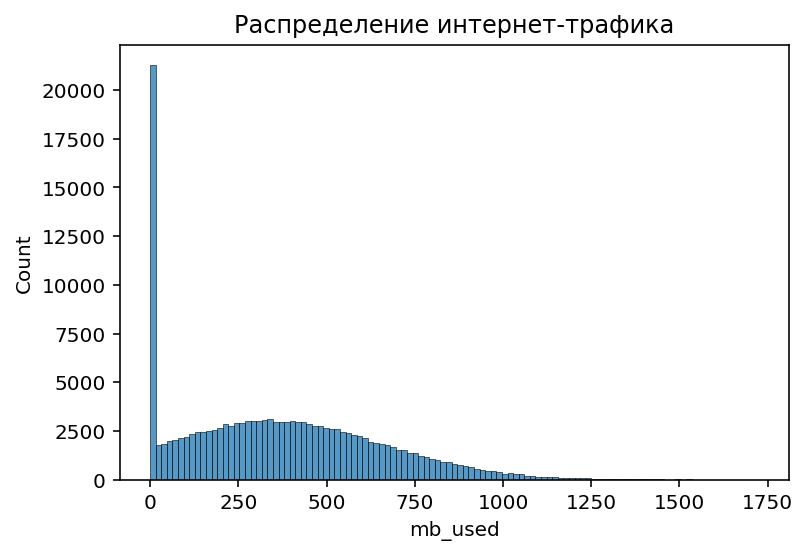

In [18]:
sns.histplot(x='mb_used', data=data_internet)
plt.title('Распределение интернет-трафика')
plt.show()

In [19]:
# кол-во пользователей с нулевм объемом трафика
len(data_internet.query('mb_used == 0')['user_id'].unique())

494

У 494 пользователей были сессии с нулевым объемом трафика, что технически невозможно. Либо объем трафика был слишком мал (подключились и тут же отключились от интернета) и при выгрузке округлили до 0 Мб, либо ошибка связана с техничесткими проблемами оператора.

In [20]:
# проверка на наличие дубликатов
datasets = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for i in datasets:
    print(i.duplicated().sum())

0
0
0
0
0


### Вывод

Данные приведены к нужным типам, заполнены пропуски. Явные дубликаты отсутствуют. Таблицы взаимосвязаны по столбцу user_id, также таблицы users и tariffs можно объединить по столбцу tariff_name. 

## Расчет основных метрик
<a id="3"></a>

### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.

In [21]:
# создаем столбец с месяцами
data_calls['month'] = data_calls['call_date'].dt.month

# округляем минуты до большего значения
data_calls['duration'] = np.ceil(data_calls['duration'])

# Расчет суммы израсходованных минут разговора по месяцам для каждого пользователя
minutes_per_month = data_calls.groupby(['user_id', 'month']).agg({'duration':'sum'}).reset_index() \
                    .rename(columns={'duration':'calls_min'})
minutes_per_month.head()

,user_id,month,calls_min
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0


In [22]:
# Расчет количества сделанных звонков по месяцам для каждого пользователя
calls_per_month = data_calls.groupby(['user_id', 'month']).agg({'duration':'count'}).reset_index() \
                .rename(columns={'duration':'calls_number'})
calls_per_month.head()

,user_id,month,calls_number
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58


### Расчет количества отправленных сообщений по месяцам для каждого пользователя

In [23]:
# создаем столбец с месяцами
data_messages['month'] = data_messages['message_date'].dt.month

# Расчет количества отправленных сообщений по месяцам для каждого пользователя
messages_per_month = data_messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index() \
                    .rename(columns={'id':'sms_number'})
messages_per_month.head()

,user_id,month,sms_number
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Расчет объема израсходованного интернет-трафика по месяцам для каждого пользователя

In [24]:
# создаем столбец с месяцами
data_internet['month'] = data_internet['session_date'].dt.month

# Расчет объема израсходованного интернет-трафика по месяцам для каждого пользователя
internet_per_month = data_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
internet_per_month.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [25]:
# округляем в большую сторону
internet_per_month['mb_used'] = np.ceil(internet_per_month['mb_used'] / 1024)

internet_per_month = internet_per_month.rename(columns={'mb_used':'gb_used'})
internet_per_month.head()

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


### Расчет помесячной выручки с каждого пользователя

In [26]:
# объединяем пользователей с данными, полученными ранее
data_final = (data_users[['user_id', 'tariff_name']]
 .merge(minutes_per_month, on=['user_id'], how='left')
 .merge(messages_per_month, on=['user_id', 'month'], how='left')
 .merge(internet_per_month, on=['user_id', 'month'], how='left')
)

data_final = data_final.fillna(0)

data_final.head()

,user_id,tariff_name,month,calls_min,sms_number,gb_used
0,1000,ultra,5.0,159.0,22.0,3.0
1,1000,ultra,6.0,172.0,60.0,23.0
2,1000,ultra,7.0,340.0,75.0,14.0
3,1000,ultra,8.0,408.0,81.0,14.0
4,1000,ultra,9.0,466.0,57.0,15.0


In [27]:
# добавим данные по тарифам
data_final_tariffs = data_final.merge(data_tariffs, on='tariff_name', how='left')
data_final_tariffs.head()

,user_id,tariff_name,month,calls_min,sms_number,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,ultra,5.0,159.0,22.0,3.0,1000,30720,3000,1950,150,1,1
1,1000,ultra,6.0,172.0,60.0,23.0,1000,30720,3000,1950,150,1,1
2,1000,ultra,7.0,340.0,75.0,14.0,1000,30720,3000,1950,150,1,1
3,1000,ultra,8.0,408.0,81.0,14.0,1000,30720,3000,1950,150,1,1
4,1000,ultra,9.0,466.0,57.0,15.0,1000,30720,3000,1950,150,1,1


In [28]:
# функция расчета выручки
def calculate_profit(df):
    
    profit = 0
    
    if df['tariff_name'] == 'smart':
        profit += 550
    if df['tariff_name'] == 'ultra':
        profit += 1950
    if df['calls_min'] > df['minutes_included']:
            profit += (df['calls_min'] - df['minutes_included']) * df['rub_per_minute']
    if df['sms_number'] > df['messages_included']:
            profit += (df['sms_number'] - df['messages_included']) * df['rub_per_message']
    if df['gb_used'] > (df['mb_per_month_included']/1024):
            profit += (df['gb_used'] - df['mb_per_month_included']/1024) * df['rub_per_gb']
        
    return profit

In [29]:
# создаем столбец с выручкой и применяем функцию к каждой строке data_final
data_final_tariffs['total_revenue'] = data_final_tariffs.apply(calculate_profit, axis=1)

# убираем лишние столбцы с параметрами тарифов
data_final = data_final_tariffs[[
    'user_id', 
    'tariff_name', 
    'month', 
    'calls_min', 
    'sms_number', 
    'gb_used', 
    'total_revenue']]

data_final.head()

,user_id,tariff_name,month,calls_min,sms_number,gb_used,total_revenue
0,1000,ultra,5.0,159.0,22.0,3.0,1950.0
1,1000,ultra,6.0,172.0,60.0,23.0,1950.0
2,1000,ultra,7.0,340.0,75.0,14.0,1950.0
3,1000,ultra,8.0,408.0,81.0,14.0,1950.0
4,1000,ultra,9.0,466.0,57.0,15.0,1950.0


## Исследовательский анализ
<a id="4"></a>

Определим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц

In [30]:
# средние значения продолжительности звонков, смс, траффика для каждого тарифа за 12 мес
metrcis_year = data_final.pivot_table(index='tariff_name', values=['calls_min', 'sms_number', 'gb_used'])
metrcis_year

,calls_min,gb_used,sms_number
tariff_name,,,
smart,418.686292,16.315056,33.366292
ultra,542.031348,19.365726,48.726228


В среднем в месяц пользователям тарифа smart требуется:
- 419 минут звонков;
- 16 Гб интернета;
- 33 СМС.

В среднем в месяц пользователям тарифа ultrs требуется:
- 542 минуты звонков;
- 19 Гб интернета;
- 49 СМС.

In [31]:
# среднее количество минут по месяцам
data_final.pivot_table(index='tariff_name', columns='month', values='calls_min').drop(0.0, axis=1)

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
tariff_name,,,,,,,,,,,,
smart,203.852941,298.689655,390.051948,367.133929,387.361702,398.067485,408.353234,423.269231,430.266409,427.590444,436.647619,479.985119
ultra,428.111111,297.125000,489.648649,475.301887,534.250000,497.469136,564.397727,530.611650,558.882883,581.728814,562.364341,614.925373


In [32]:
def get_distribution(column, bins):
    
    fig, axs = plt.subplots(1,2, figsize=(20,7), sharey=True)
    fig.suptitle(f'Распределение {column}', fontsize=20)
    sns.histplot(x=column, data=data_final.query('tariff_name == "smart"'), bins=bins, ax=axs[0])
    axs[0].set_title('Smart', fontsize=15)
    sns.histplot(x=column, data=data_final.query('tariff_name == "ultra"'), bins=bins, ax=axs[1])
    axs[1].set_title('Ultra', fontsize=15)
    fig.tight_layout()

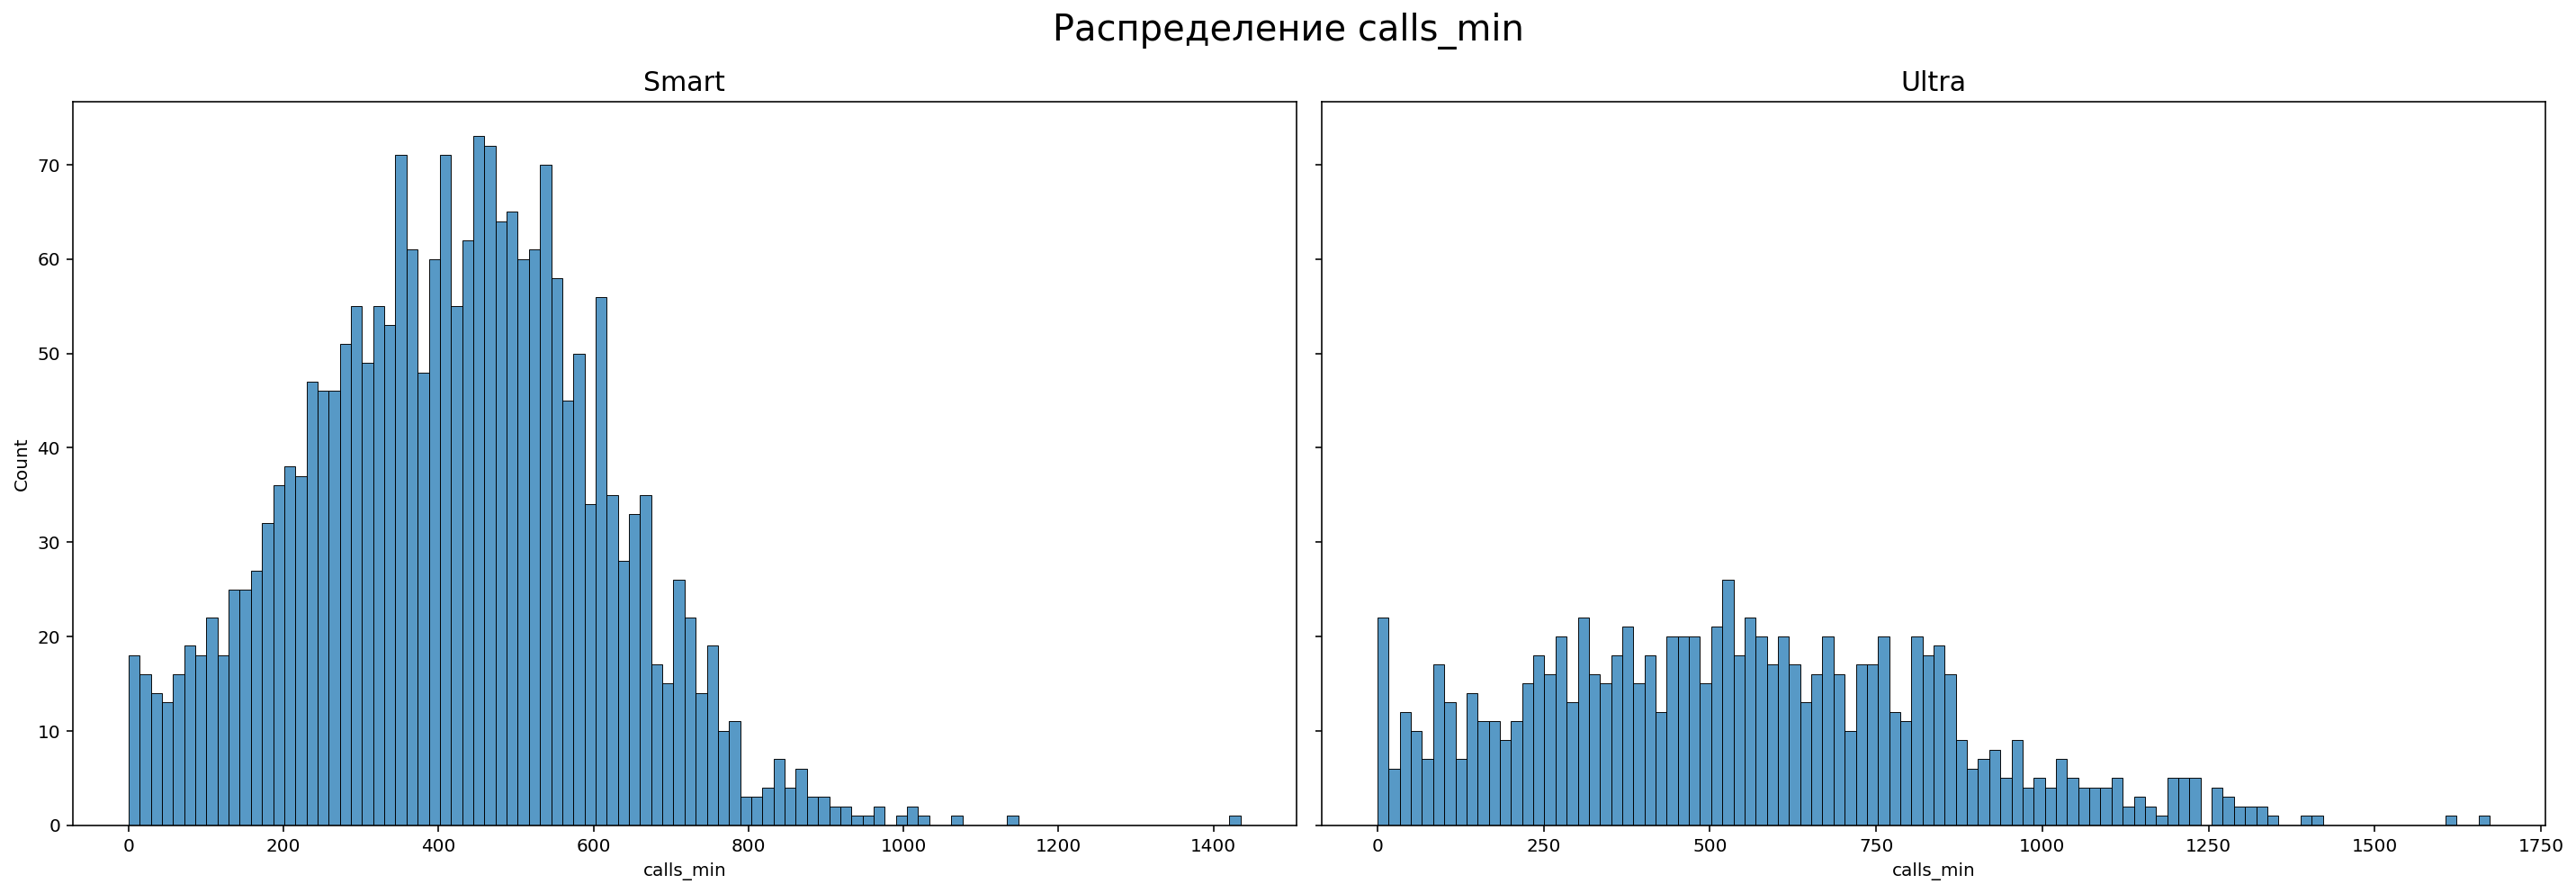

In [33]:
get_distribution('calls_min', 100)

In [34]:
# среднее значение ГБ по месяцам
data_final.pivot_table(index='tariff_name', columns='month', values='gb_used').drop(0.0, axis=1)

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
tariff_name,,,,,,,,,,,,
smart,8.735294,11.844828,15.233766,13.625000,15.907801,15.969325,15.875622,16.760684,16.389961,16.870307,16.996825,18.205357
ultra,13.222222,12.000000,17.648649,17.528302,19.671875,18.925926,20.443182,19.611650,19.135135,20.093220,19.666667,21.649254


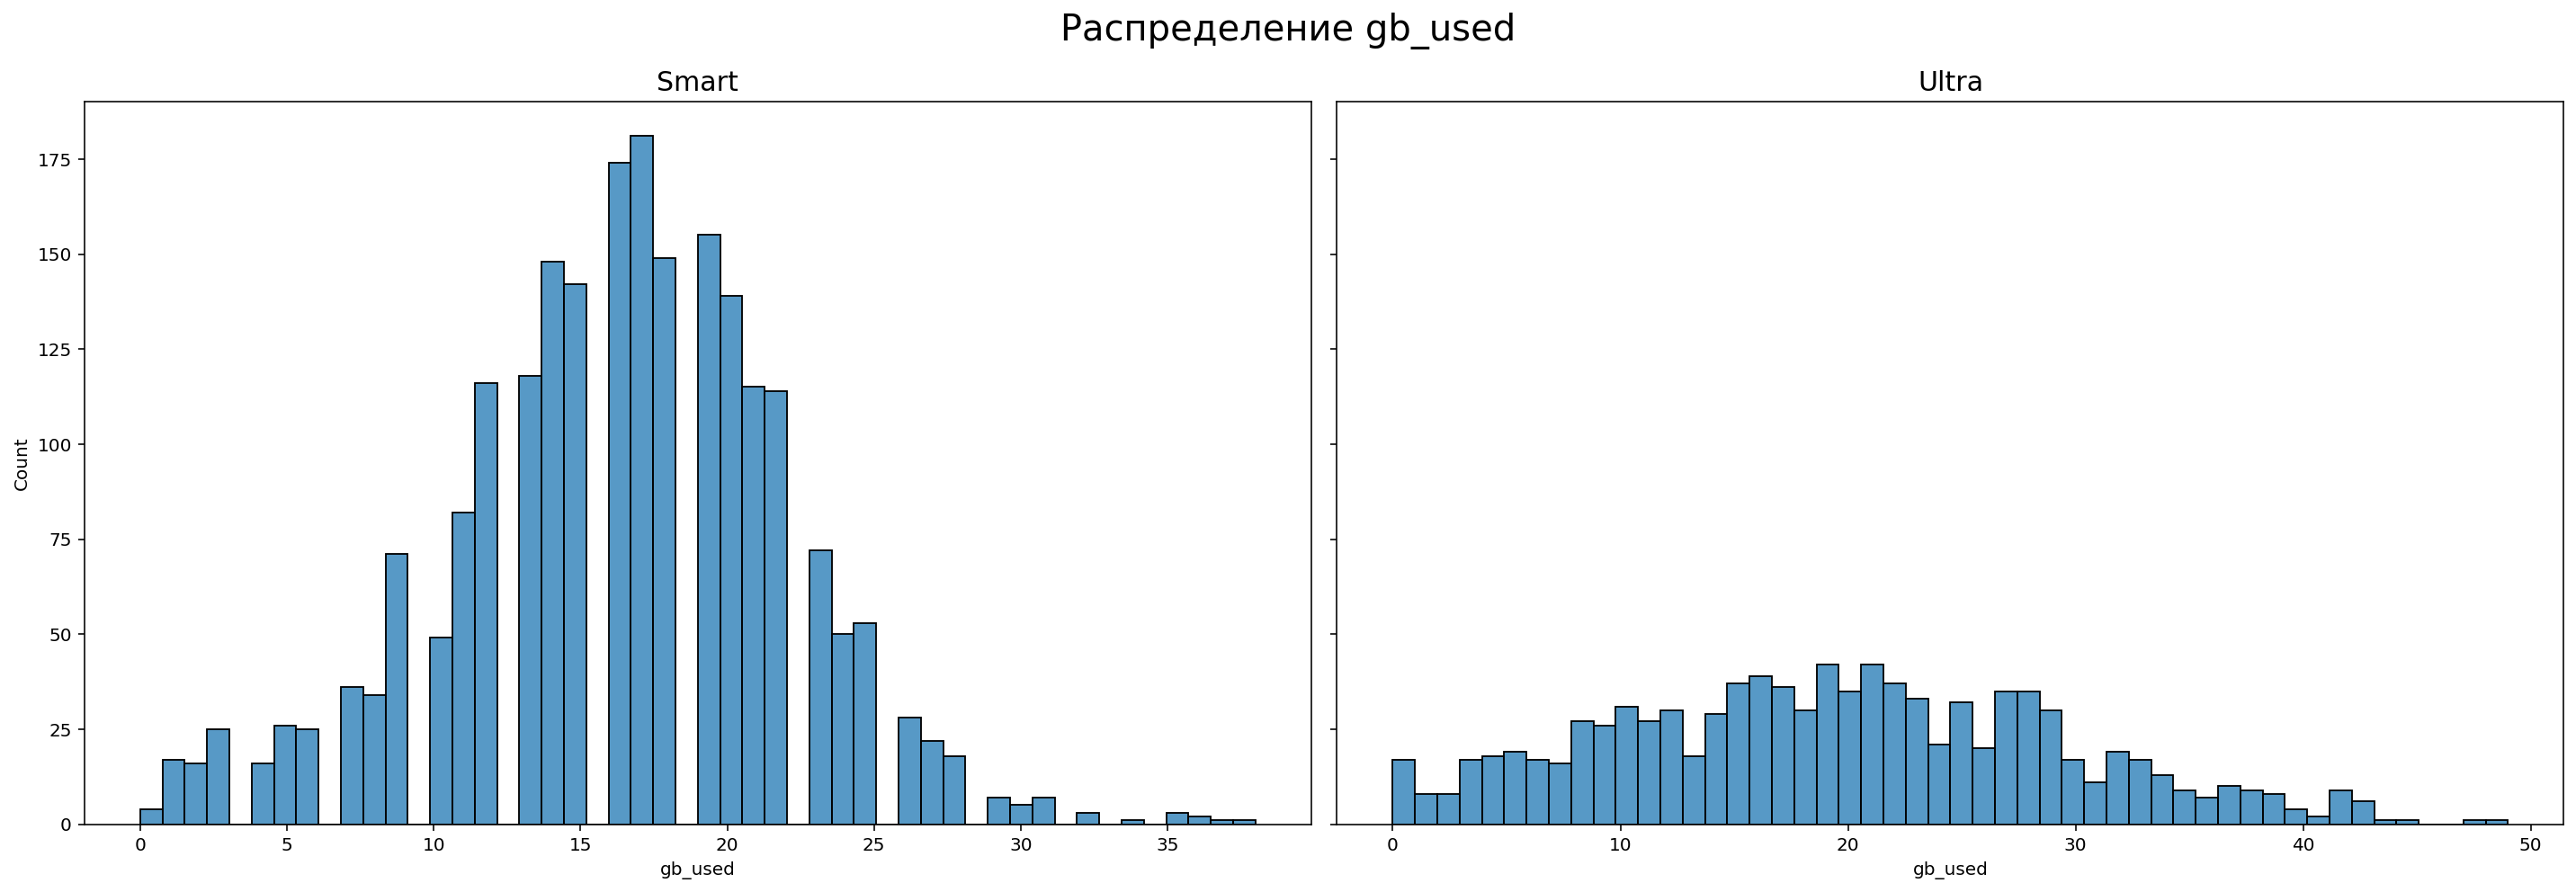

In [35]:
get_distribution('gb_used', 50)

In [36]:
# среднее количество смс по месяцам
data_final.pivot_table(index='tariff_name', columns='month', values='sms_number').drop(0.0, axis=1)

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
tariff_name,,,,,,,,,,,,
smart,18.235294,24.086207,31.857143,30.741071,33.773050,33.312883,33.751244,33.709402,33.644788,33.808874,34.120635,35.997024
ultra,33.777778,21.958333,32.297297,32.584906,37.859375,40.049383,48.477273,47.864078,51.810811,58.466102,56.000000,60.753731


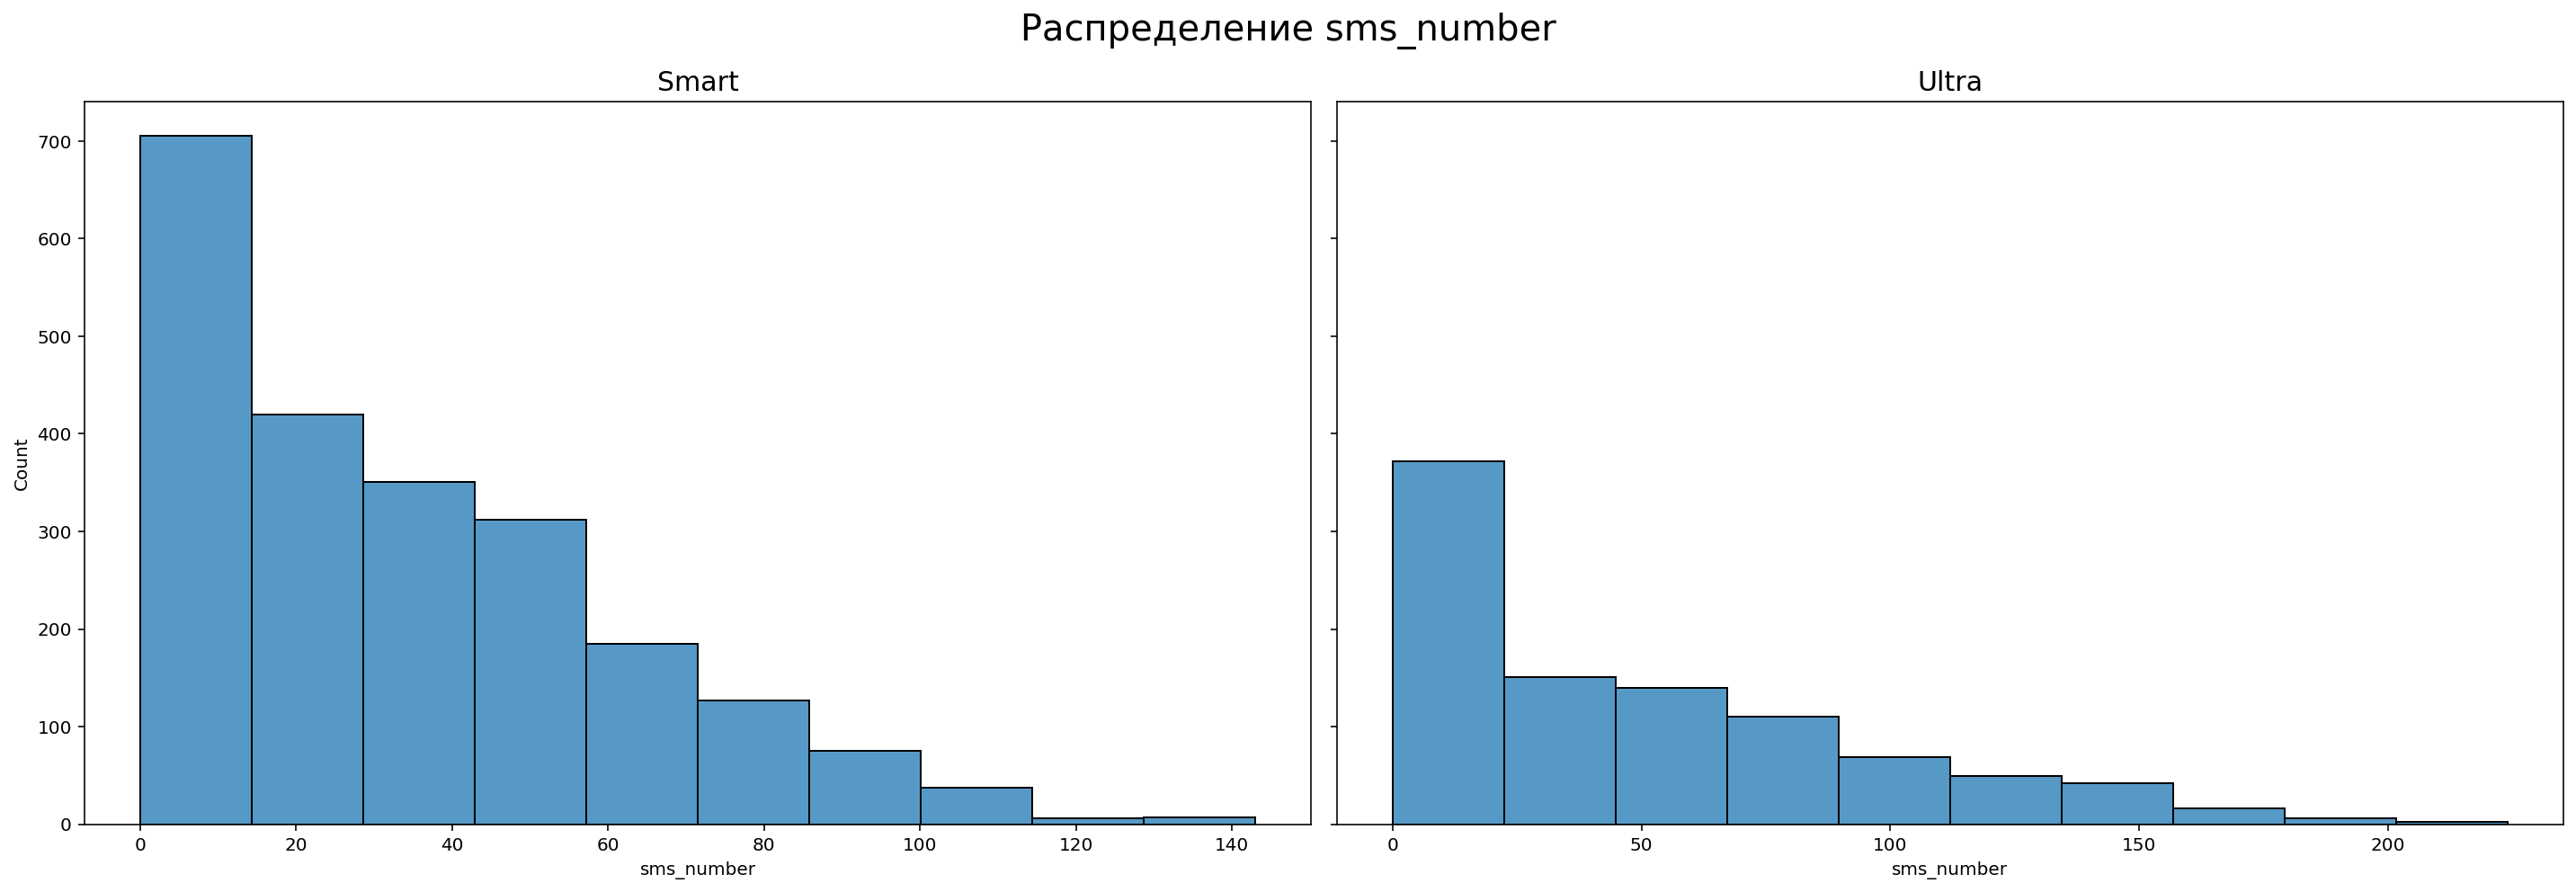

In [37]:
get_distribution('sms_number', 10)

In [38]:
def calculate_stats(tariff, metrics):
    '''
    Возвращает значения дисперсии, ст.отклонения, нижнюю и верхнюю границу интервала 99% значений 
    по тарифу tariff и метрике metrics(calls_min, gb_used, sms_number) в виде датафрейма
    '''
    data = (data_final.pivot_table(index='tariff_name', columns='month', values=metrics)
            .drop(0.0, axis=1)
            .loc[tariff])
    variance = round(np.var(data, ddof=1), 2)
    standard_dev = round(np.std(data, ddof=1), 2)
    bottom = round(data.mean() - 3 * standard_dev, 2)
    top = round(data.mean() + 3 * standard_dev, 2)
    d = {
        'Metrics' : [metrics, metrics, metrics, metrics],
        'Tariff' : [tariff, tariff, tariff, tariff],
        'Stats' : ['Var', 'Std', 'Bottom', 'Top'],
        'Values' : [variance, standard_dev, bottom, top]
    }
    return pd.DataFrame(d)

In [39]:
# объединим все полученные функцией calculate_stats датафреймы в один
stats_total = pd.DataFrame()
for i in ['smart', 'ultra']:
    for j in ['calls_min', 'gb_used', 'sms_number']:
        stats_total = stats_total.append(calculate_stats(i,j))

stats_total.reset_index(inplace=True, drop=True)

# сгруппируем в более компактный вид
(stats_total.pivot_table(index=['Tariff', 'Metrics'], columns='Stats', values='Values')
.reindex(['Var', 'Std', 'Bottom', 'Top'], axis=1))

Stats                  Var    Std  Bottom     Top
Tariff Metrics                                   
smart  calls_min   5296.90  72.78  169.27  605.95
       gb_used        6.91   2.63    7.31   23.09
       sms_number    26.09   5.11   16.09   46.75
ultra  calls_min   7185.12  84.77  256.92  765.54
       gb_used        8.37   2.89    9.63   26.97
       sms_number   148.89  12.20    6.89   80.09

### Вывод

99% абонентов тарифа smart в месяц: 
- тратят от 169 до 605 мин;
- расходуют от 7 до 23 Гб интернет-трафика;
- отправляют от 16 до 47 СМС.

99% абонентов тарифа ultra в месяц: 
- тратят от 257 до 765 мин;
- расходуют от 10 до 27 Гб интернет-трафика;
- отправляют от 7 до 80 СМС.

In [40]:
# среднее значение выручки в месяц
data_final.pivot_table(index='tariff_name', values='total_revenue')

,total_revenue
tariff_name,
smart,1290.225169
ultra,2070.219436


Выручка по тарифу ultra в среднем в месяц приносит на 60% больше выручки.

In [41]:
revenue_per_month = (data_final.pivot_table(
                    index='tariff_name', columns='month', values='total_revenue')
                    .drop(0.0, axis=1))
revenue_per_month

month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
tariff_name,,,,,,,,,,,,
smart,721.323529,827.603448,1164.623377,963.089286,1197.510638,1208.030675,1223.950249,1323.888889,1251.104247,1364.221843,1343.660317,1580.401786
ultra,1950.000000,1975.000000,2014.864865,2003.773585,2064.843750,2042.592593,2123.863636,2085.436893,2022.972973,2069.491525,2091.860465,2133.582090


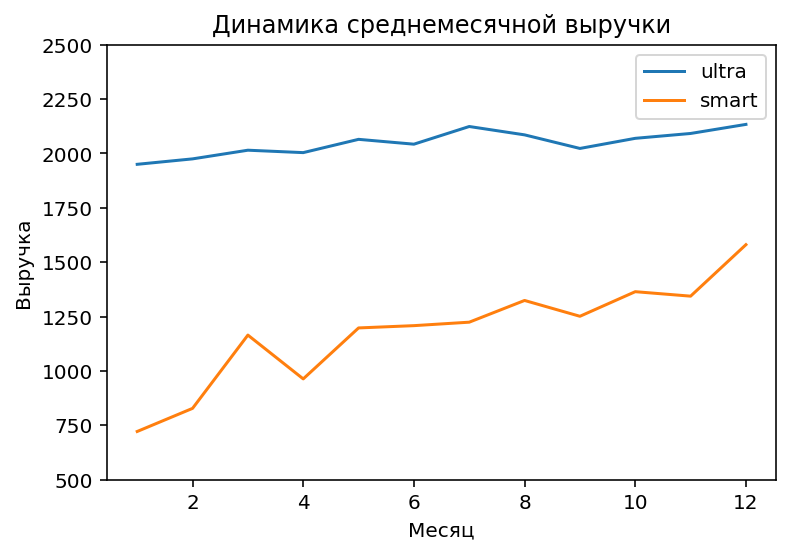

In [42]:
plt.plot(revenue_per_month.loc['ultra'], label='ultra')
plt.plot(revenue_per_month.loc['smart'], label='smart')
plt.ylim(500,2500)
plt.ylabel('Выручка')
plt.xlabel('Месяц')
plt.title('Динамика среднемесячной выручки')
plt.legend()
plt.show()

За рассматриваемый период среднемесячная выручка в целом росла по обоим тарифам с небольшими периодами снижения. Выручка по тарифу smart росла более быстрыми темпами.

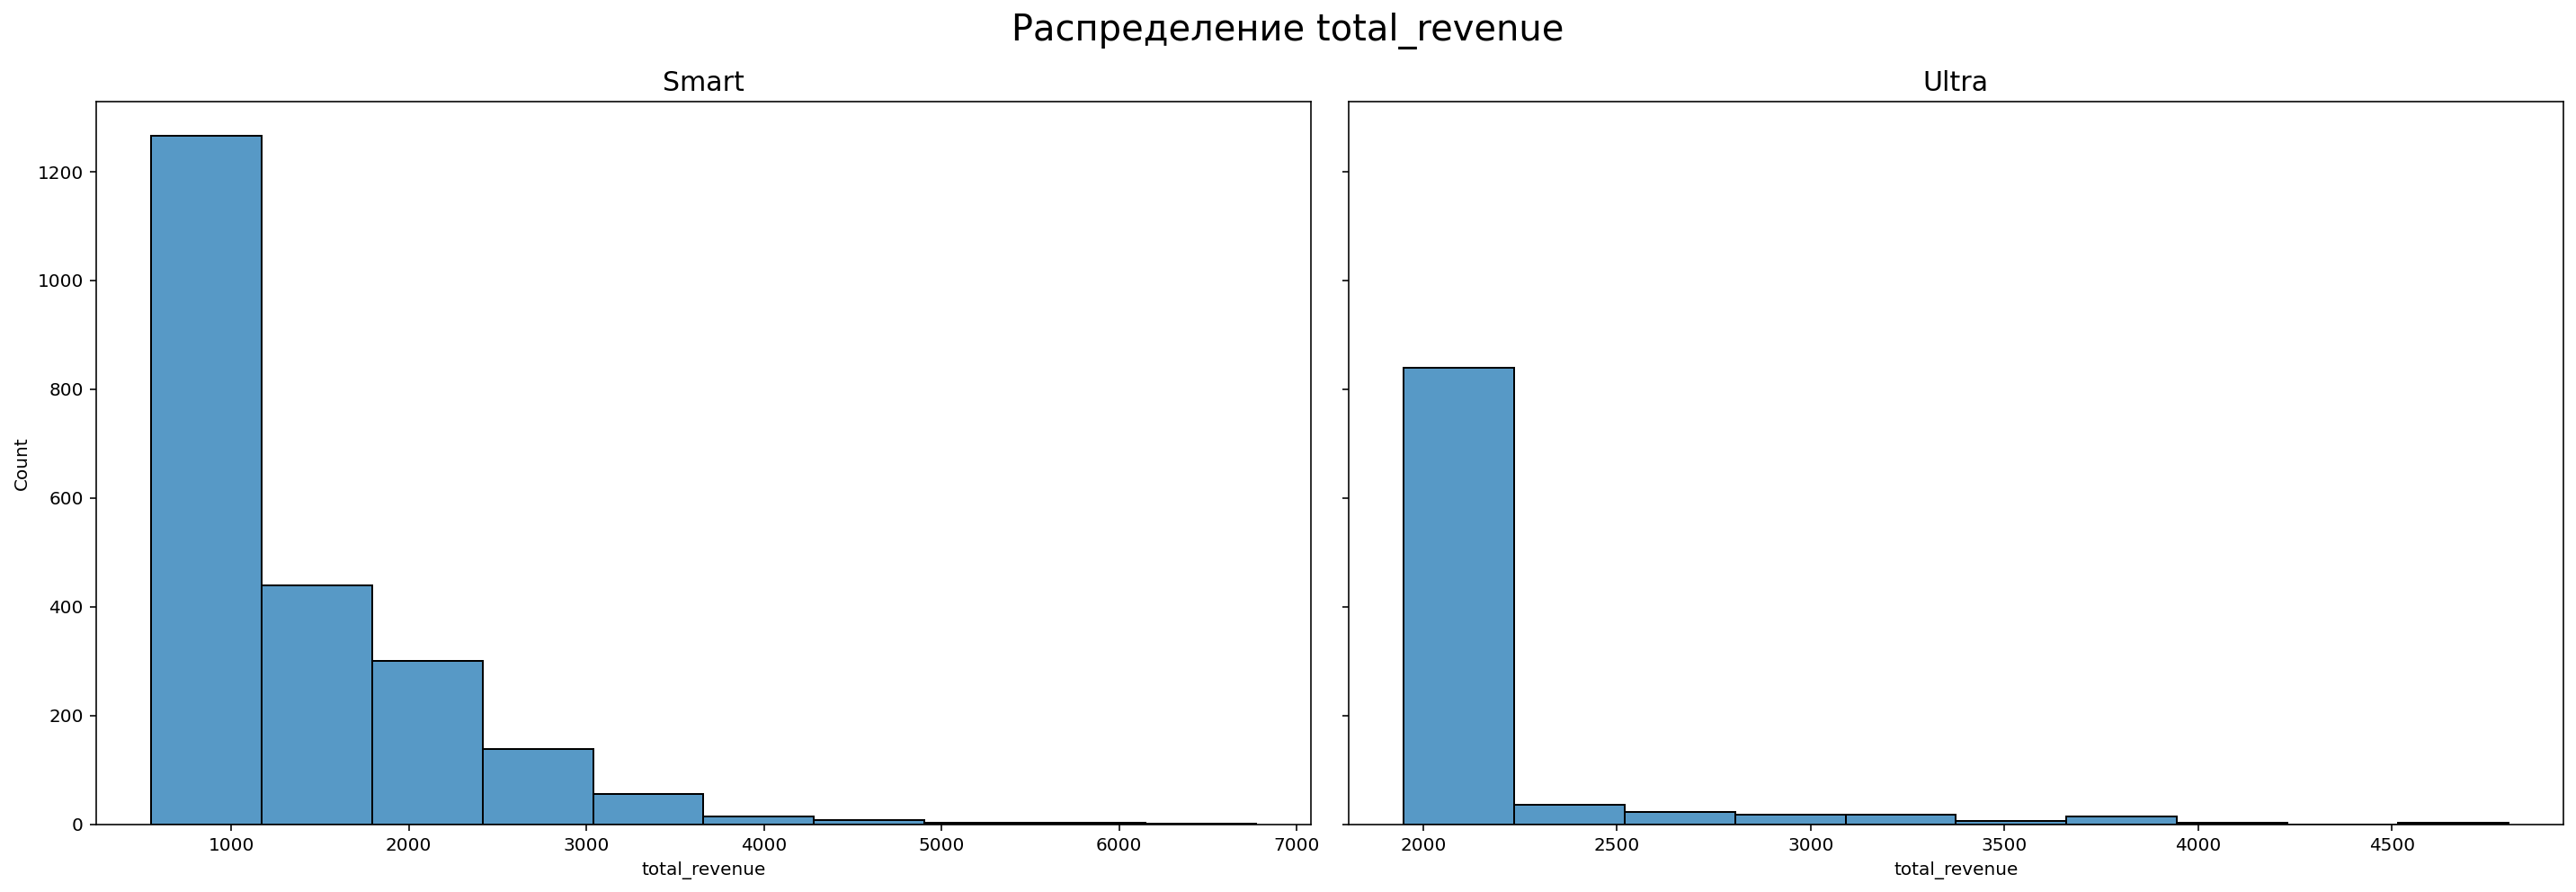

In [43]:
get_distribution('total_revenue', 10)

In [44]:
stats_total_revenue = pd.DataFrame()
for i in ['smart', 'ultra']:
    stats_total_revenue = stats_total_revenue.append(calculate_stats(i,'total_revenue'))

stats_total_revenue.reset_index(inplace=True, drop=True)

(stats_total_revenue.pivot_table(index=['Tariff'], columns='Stats', values='Values')
.reindex(['Var', 'Std', 'Bottom', 'Top'], axis=1))

Stats,Var,Std,Bottom,Top
Tariff,,,,
smart,57424.96,239.64,461.86,1899.70
ultra,3253.87,57.04,1877.07,2219.31


### Вывод

В среднем в месяц по выборке абоненты ultra приносят больше выручки.

## Проверка гипотез
<a id="5"></a>

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза Н0: Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Альтернативная гипотеза Н1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

In [45]:
# Применяем метод для проверки гипотезы о равенстве среднего 
# двух генеральных совокупностей по взятым из них выборкам

alpha = .01 

results = st.ttest_ind(
    data_final.query('tariff_name == "ultra"')['total_revenue'], 
    data_final.query('tariff_name == "smart"')['total_revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.7573403948209683e-156
Отвергаем нулевую гипотезу


### Вывод

Скорее всего, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Нулевая гипотеза Н0: Cредняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Альтернативная гипотеза Н1: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [46]:
# добавим столбец с городами в соответствии с user_id
data_final_cities = data_final.merge(data_users[['user_id', 'city']], on='user_id', how='left')
data_final_cities.head()

,user_id,tariff_name,month,calls_min,sms_number,gb_used,total_revenue,city
0,1000,ultra,5.0,159.0,22.0,3.0,1950.0,Краснодар
1,1000,ultra,6.0,172.0,60.0,23.0,1950.0,Краснодар
2,1000,ultra,7.0,340.0,75.0,14.0,1950.0,Краснодар
3,1000,ultra,8.0,408.0,81.0,14.0,1950.0,Краснодар
4,1000,ultra,9.0,466.0,57.0,15.0,1950.0,Краснодар


In [47]:
# Применяем метод для проверки гипотезы о равенстве среднего 
# двух генеральных совокупностей по взятым из них выборкам

alpha = .01 

results = st.ttest_ind(
    data_final_cities.query('city == "Москва"')['total_revenue'], 
    data_final_cities.query('city != "Москва"')['total_revenue'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.46586169582718384
Не получилось отвергнуть нулевую гипотезу


In [48]:
def is_moscow(df):
    "Возвращает True, если город соответствует Москве, иначе False"
    return df['city'] == 'Москва'

data_final_cities['moscow'] = data_final_cities.apply(is_moscow, axis=1)

In [49]:
# средняя выручка по Москве и другим регионам в разрере тарифов
data_final_cities.pivot_table(index='tariff_name', columns='moscow', values='total_revenue')

moscow,False,True
tariff_name,,
smart,1300.902121,1239.357513
ultra,2068.894952,2074.553571


### Вывод

Скорее всего, средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

## Общий вывод
<a id="6"></a>

В ходе анализа обнаружены следующие проблемы:
- 8 абонентов в выборке не совершали звонки;
- 74 абонента не отправляли СМС;
- 3 абонента не пользовались интернетом;
- У 494 пользователей были сессии с нулевым объемом трафика.

В среднем в течение года пользователи тарифа "Ультра" больше разговаривают, отправляют смс и пользуются интернетом.

Вероятнее всего, средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. При этом, средняя выручка пользователей из Москвы, скорее всего, не отличается от других регионов. 

Несмотря на то, что за рассматриваемый период тариф "Ультра" приносит больше выручки, выручка по тарифу "Смарт" растет более быстрыми темпами. **Маркетинговому департаменту целесообразно сосредоточиться на тарифе "Смарт" в целях дальнейшего стимулирования роста.**